In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

### Decision Tree
- 분류와 회귀 문제에 널리 사용하는 모델.
- 기본적으로 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습

`구성요소`
1. 노드: 질문이나 정답을 담은 네모상자
2. 리프(leaf) : 마지막 노드
3. 루트노드 : 맨처음 노드
4. 순수노드 : 타깃 하나로만 이루어진 리프노드

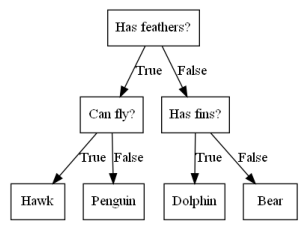

In [2]:
mglearn.plots.plot_animal_tree()

#### 결정트리 만들기
- 결정트리를 학습한다 **=** 정답에 가장 빨리 도달하는 예/아니로 질문 목록을 학습한다
- 머신러닝에서는 이러한 질문들을 테스트라고 함.(모델이 잘 일반화 되었는지 테스할때 사용하는 테스트셋과 혼동 x)
- 트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고름
- 데이터를 분할하는 것은 각 분할된 영역이 (결정트리의 리프) 한 개의 타깃값(하나의 클래스나 하나의 회귀분석결과)을 가질 때 까지 반복
- 찾은 리프노드의 훈련 데이터 평균값이 데이터 포인트의 출력값이 됨

#### 결정 트리 복잡도 제어하기
- 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨.
- 순수 노드로 이루어진 트리는 훈련 세트에 100%정확하게 맞는다는 의미.즉, 훈련세트의 모든 데이터 포인트는 정확한 클래스의 리프노드에 있음.
- 결정경계는 클래스의 포인트들에서 멀리 떨어진 이상치 하나에 민감함.

**`과대적합 방지 전략`**
1. **사전가지치기(가치지기)** : 트리 생성을 일찍 중단. 트리의 최대 깊이나 리프의 최대갯수 제한, 또는 노드 분할하기 위한 포인트의 최소 개수 지정. scikit-learn에서 결정트리는 DecisionTreeClassifier와 DecisionTreeRegressor에 구현되어 있으며 사전가지치기만 지원
2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거 나 병합

In [4]:
# 유방암 데이터로 사전가지치기 효과 분석

# 가지치기 x
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(f'train accuracy:{tree.score(X_train,y_train):.3f}')
print(f'test accuracy:{tree.score(X_test,y_test):.3f}')

#모든 리프노드가 순수노드이므로 훈련정확도는 100%

train accuracy:1.000
test accuracy:0.937


In [5]:
# 가지치기 o
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print(f'train accuracy:{tree.score(X_train,y_train):.3f}')
print(f'test accuracy:{tree.score(X_test,y_test):.3f}')
#테스트 점수 개선 확인

train accuracy:0.988
test accuracy:0.951


#### 결정트리 분석
- export_graphviz 함수 이용해 트리 시각화

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['악성','양성'], feature_names=cancer.feature_names, impurity=False,filled=True)

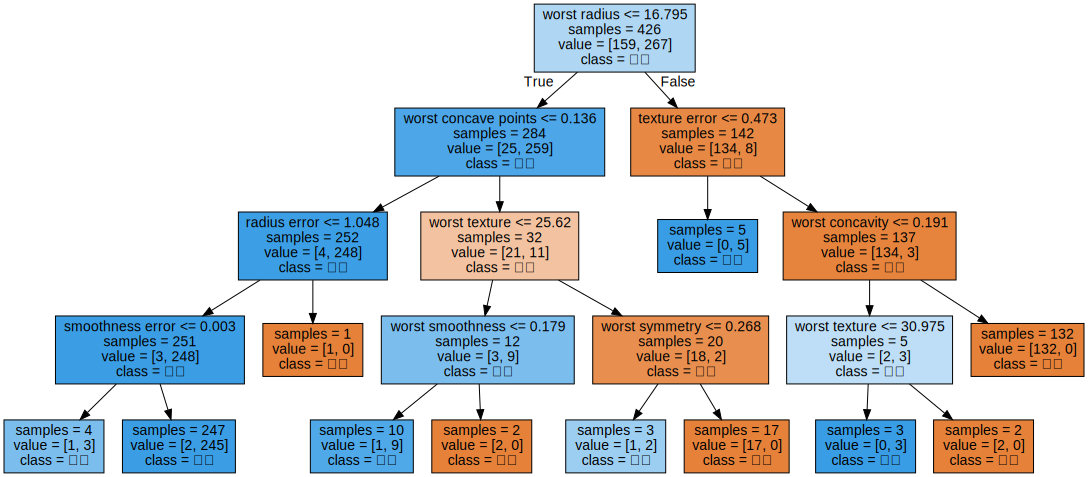

In [14]:
import graphviz
# file_open = open("./tree.dot", 'r', encoding="UTF-8")
with open('tree.dot','r', encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### **`트리의 특성 중요도 (feature importances)`**
- 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가
- 0 과 1 사이 값. 각 특성에 대해 0은 전혀 사용되지 않음을 뜻하고, 1은 완벽하게 타깃 클래스를 예측했다는 뜻.
- 특성 중요도의 전체 합은 1

In [20]:
len(cancer.feature_names)

30

In [15]:
print(f'feature importances:\n{tree.feature_importances_}')

feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


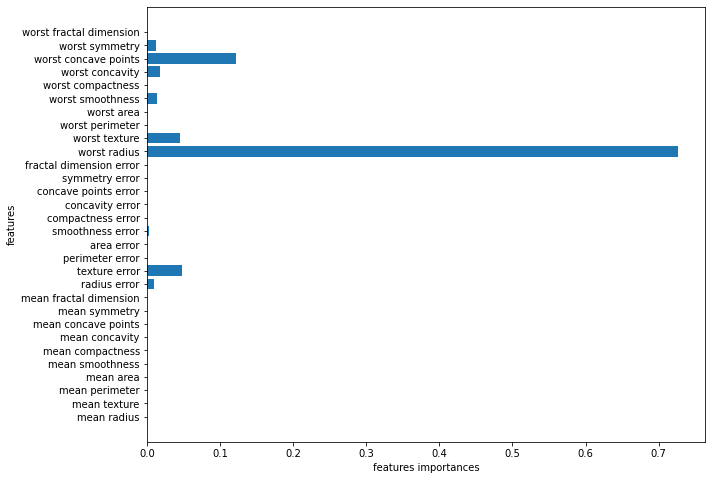

In [18]:
def plot_feature_importaces_cancer(model):
    n_features= cancer.data.shape[1]
    plt.figure(figsize=(10,8))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('features importances')
    plt.ylabel('features')
plot_feature_importaces_cancer(tree)

#위에 graphviz에서 첫번째 노드로 사용한 특성 worst radius가 가장 중요한 특성으로 나타남. 

> 그러나 어떤 특성의 feature importances_값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님.   
    단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일수도 있음.  
    
> 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없음. 
    특성과 클래스 사이에는 간단하지 않은 고나계가 있을 수 있음 . 살펴보자~

Feature importances: [0. 1.]


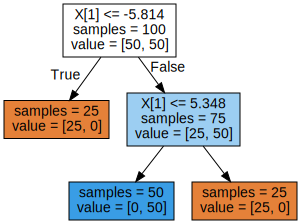

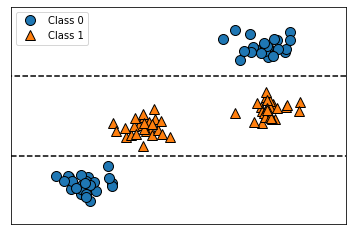

In [19]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 두개의 특성과 두개의 클래스를 가진 데이터셋.
# X[1]에 있는 정보만 사용되었고, X[0]은 전혀 사용되지 않음. 
# 하지만 X[1]과 출력 클래스와의 관계는 단순하게 비례 또는 비례하지 않을 수 있음.

> 여기서 결정트리를 가지고 분류에 대해서만 논하고 있지만 여기서 말한 것들은 DecisionTreeRegressor로 구현된 회귀결정트리에서도 비슷하게 적용됨  
    회귀 트리의 사용법과 분석은 분류 트리와 매우 비슷

> 차이점 : 회귀를 위한 트리 기반의 모델을 사용할 때는 외삽(extrapolation), 즉 훈련데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음

#####  컴퓨터 메모리 가격 동향 데이터셋 사용

Text(0, 0.5, 'price($/Mbyte)')

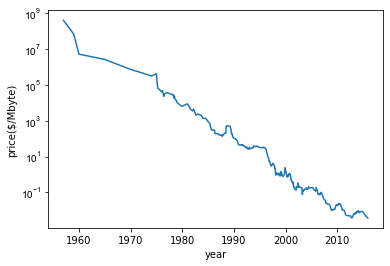

In [23]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('year')
plt.ylabel('price($/Mbyte)')         

# y축은 로그 스케일. 그래프를 로그스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬움            

+ 날짜 특성 하나만으로 2000년 후의 가격 예측해보기
+ 가격을 로그스케일로 바꾸면 DecesionTreeRegressor를 사용하는 데는 아무런 차이가 없지만, LinearRegression 에는 큰 차이가 있음.
+ 모델을 훈련시키고 예측을 수행한 다음 로그스케일을 되돌리기 위해 지수함수를 적용.

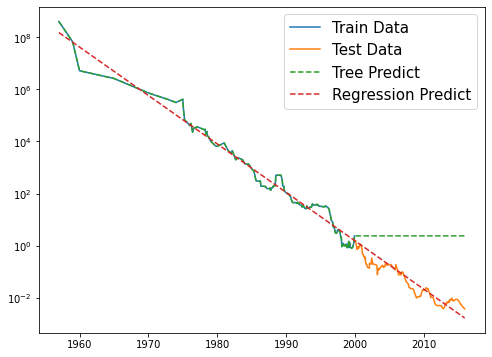

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 우해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.figure(figsize=(8,6))
plt.semilogy(data_train.date, data_train.price, label = 'Train Data')
plt.semilogy(data_test.date,data_test.price, label= 'Test Data')
plt.semilogy(ram_prices.date,price_tree,'--',label='Tree Predict',)
plt.semilogy(ram_prices.date,price_lr,'--',label='Regression Predict')
plt.legend(fontsize = 15)


 [`그래프 설명`]
+ **LinearRegression** : 직선으로 데이터 근사. 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여 데스트 데이터를 꽤 정확히 예측
+ **DecesionTreeRegression** : 트리모델은 훈련데이터를 완벽하게 예측. 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문. 그러나 모델이 가진 데이터 범위 밖으로 나가게 되면 단순히 마지막 포인트를 이용해 예측하는 게 전부. _`트리모델은 데이터 밖의 새로운 데이터를 예측할 능력이 없음.`_ 이는 모든 트리기반모델의 공통된 단점

+ 트리기반 모델로 좋은 예측을 만들 수는 있음(예를 들면 가격이 오르거나 내릴지를 예측할 때). 위 예제의 경우 트리 모델이 시계열데이터엔 잘 맞지 않는다는 것과 트리가 어떻게 예측을 만드는지 그 특성을 보여주기 위함임.

### 장단점과 매개변수

**`매개변수`**
- 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수 => max_depth, max_leaf_nodes, mim_samples_leaf 중 하나만 지정해도 됨

**`장점`**
1. 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉬움.
2. 데이터 스케일에 구애 받지 않음. 각 특성이 개별적으로 처리되어 데이터를 분할하는 데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없음. 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동

**`단점`**
1. 사전 가지치기를 사용함에도 불구하고 과대적합이 되는 경향이 있어 일반화 성능이 좋지 않음

`대안` : __**앙상블 방법**__ 을 단일 결정 트리의 대안으로 흔히 사용함